<a href="https://colab.research.google.com/github/jennabittner/ASTRON-5205/blob/main/Project_2_Bittner_Holty_Eggenschwiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Planet HD 209458 Radial Velocity, Mass**

In [ ]:
# read in RV data

import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii
%matplotlib inline

# Import csv file
# file called
tab = astropy.io.ascii.read('UID_0108859_RVC_003.tbl.txt', format = 'ipac')

In [ ]:
# Print column names
print('Column names:')
print()
tab.colnames

Column names:



['BJD', 'Radial_Velocity', 'Radial_Velocity_Uncertainty']

In [ ]:
BJD = tab['BJD'].data
RV = tab['Radial_Velocity'].data

In [ ]:
!pip install radvel
import radvel

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.11/dist-packages/radvel/gp.py:32: ImportWarning: celerite not installed. GP kernals using celerite will n

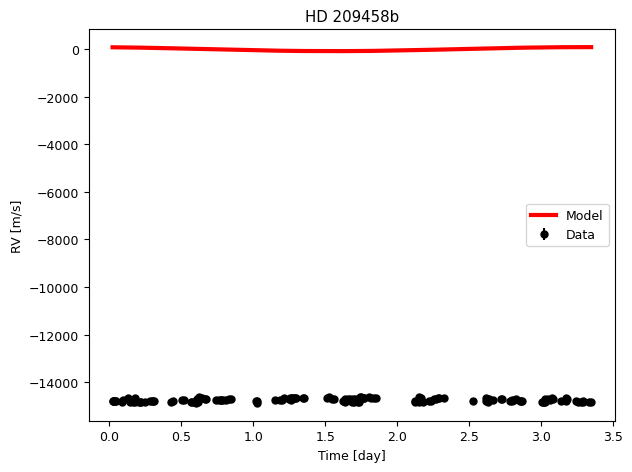

In [ ]:
from astropy.constants import G, M_sun

# Extracting time (Barycentric Julian Date)
t = tab["BJD"].data

# Orbital parameters: [P, T_periastron, e, omega, K]
orbital_solution = [3.5, 2453234.605566, 0, 83 / 360.0 * 2 * np.pi, 84.27]  # Period, Time at Periastron, Eccentricity, Argument of Periastron, RV Semi-Amplitude

# Compute radial velocities from model
rvs = radvel.kepler.rv_drive(t, orbital_solution, use_c_kepler_solver=False)

# Extract orbital parameters
P = orbital_solution[0]  # Period in days
e = orbital_solution[2]  # Eccentricity
K = orbital_solution[4]  # RV semi-amplitude in m/s

# === Plot Observed vs Modeled RVs ===
# Fold data by orbital period
ind = np.argsort(t % P)
plt.errorbar(tab["BJD"] % P, tab["Radial_Velocity"], tab["Radial_Velocity_Uncertainty"],
             color="black", ms=5, marker="o", ls="none", label="Data")
plt.plot((t % P)[ind], rvs[ind], "r-", label="Model", lw=3)
plt.legend()
plt.xlabel("Time [day]")
plt.ylabel("RV [m/s]")
plt.title("HD 209458b")
plt.tight_layout()



**Calculate Mpsini**

In [ ]:
# ==== Compute Planetary Minimum Mass (M_p sin i) ====
# Convert period to seconds (since we use SI units)
P_sec = P * 86400  # days to seconds

# Assume stellar mass (adjust if known)
M_star = 1.0 * M_sun.value  # 1 Solar mass in kg (adjust if known)

# Compute M_p sin i using the radial velocity equation
Mp_sini = (K * P_sec**(1/3) * M_star**(2/3)) / ((2 * np.pi * G.value)**(1/3) * np.sqrt(1 - e**2))

# Convert to Jupiter masses (1 Jupiter mass = 1.898 x 10^27 kg)
M_jup = 1.898e27  # kg
Mp_sini_Mjup = Mp_sini / M_jup

# Print the result
print(f"Minimum planet mass HD 209458b (M_p sin i): {Mp_sini_Mjup:.4f} M_Jup")


Minimum planet mass HD 209458b (M_p sin i): 0.6296 M_Jup


In [ ]:
# ==== To Calculate the True Planet Mass M_p ====
# Input orbital inclination (in degrees)
i_deg = 90  # Example: if you know the inclination, change this value
i_rad = np.radians(i_deg)  # Convert inclination to radians

# Calculate true mass of the planet
Mp_true = Mp_sini / np.sin(i_rad)

# Convert true mass to Jupiter masses
Mp_true_Mjup = Mp_true / M_jup

# Print the true planet mass
print(f"True planet mass HD 209458b (M_p): {Mp_true_Mjup:.4f} M_Jup")

# Convert Jupiter mass to Earth mass (1 Jupiter mass = 317.8 Earth masses)
Mp_true_Mearth = Mp_true_Mjup * 317.8

# Print the true planet mass in Earth masses
print(f"True planet mass HD 209458b (M_p): {Mp_true_Mearth:.4f} M_Earth")#

True planet mass HD 209458b (M_p): 0.6296 M_Jup
True planet mass HD 209458b (M_p): 200.0783 M_Earth


In [ ]:
# === Uncertainty Propagation ===
# Extract the uncertainty in RV semi-amplitude (K)
K_uncertainty = tab["Radial_Velocity_Uncertainty"].mean()  # Mean uncertainty in K

# Compute the uncertainty in the planet's mass
dMp_dK = (P_sec**(1/3) * M_star**(2/3)) / ((2 * np.pi * G.value)**(1/3) * np.sqrt(1 - e**2) * np.sin(i_rad))
sigma_Mp = dMp_dK * K_uncertainty

# Convert uncertainty in mass to Earth masses
sigma_Mp_Mearth = sigma_Mp / M_jup * 317.8

# Print the uncertainty in the planet's mass
print(f"Uncertainty in planet mass HD 209458b (σ_M_p): {sigma_Mp_Mearth:.4f} M_Earth")

Uncertainty in planet mass HD 209458b (σ_M_p): 24.2982 M_Earth


# **Planet HD 189733b Radial Velocity, Mass**

In [ ]:
# Import csv file
tab2 = astropy.io.ascii.read('UID_0098505_RVC_002.tbl.txt', format = 'ipac')

In [ ]:
# Print column names
print('Column names:')
print()
tab2.colnames

Column names:



['JD', 'Radial_Velocity', 'Radial_Velocity_Uncertainty']

In [ ]:
JD = tab2['JD'].data
RV_2 = tab2['Radial_Velocity'].data

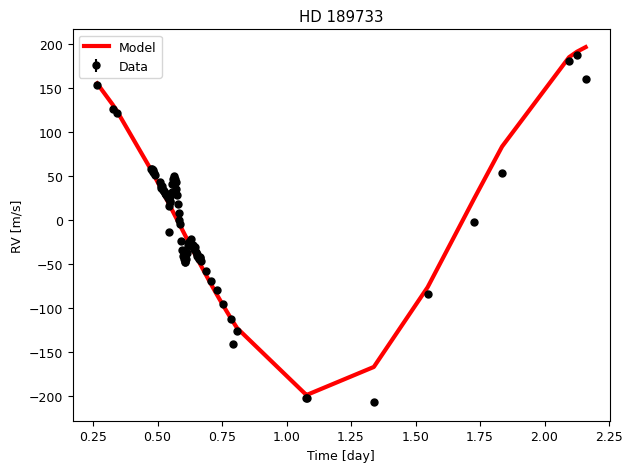

In [ ]:
from astropy.constants import G, M_sun

# Extracting time (Barycentric Julian Date)
j = tab2["JD"].data

# Orbital parameters: [P, T_periastron, e, omega, K]
orbital_solution2 = [2.218575200, 2452832.881794, 0, 445 / 360.0 * 2 * np.pi, 201.3]  # Period, Time at Periastron, Eccentricity, Argument of Periastron, RV Semi-Amplitude

# Compute radial velocities from model
rvs_2 = radvel.kepler.rv_drive(j, orbital_solution2, use_c_kepler_solver=False)

# Extract orbital parameters
P_2 = orbital_solution2[0]  # Period in days
e_2 = orbital_solution2[2]  # Eccentricity
K_2 = orbital_solution2[4]  # RV semi-amplitude in m/s

# === Plot Observed vs Modeled RVs ===
# Fold data by orbital period
ind_2 = np.argsort(j % P_2)
plt.errorbar(tab2["JD"] % P_2, tab2["Radial_Velocity"], tab2["Radial_Velocity_Uncertainty"],
             color="black", ms=5, marker="o", ls="none", label="Data")
plt.plot((j % P_2)[ind_2], rvs_2[ind_2], "r-", label="Model", lw=3)
plt.legend()
plt.xlabel("Time [day]")
plt.ylabel("RV [m/s]")
plt.title("HD 189733")
plt.tight_layout()


**Compute Mpsini**

In [ ]:
# ==== Compute Planetary Minimum Mass (M_p sin i) ====
# Convert period to seconds (since we use SI units)
P_sec_2 = P_2 * 86400  # days to seconds

# Assume stellar mass (adjust if known)
M_star_2 = 1.0 * M_sun.value  # 1 Solar mass in kg (adjust if known)

# Compute M_p sin i using the radial velocity equation
Mp_sini_2 = (K_2 * P_sec_2**(1/3) * M_star_2**(2/3)) / ((2 * np.pi * G.value)**(1/3) * np.sqrt(1 - e_2**2))

# Convert to Jupiter masses (1 Jupiter mass = 1.898 x 10^27 kg)
M_jup = 1.898e27  # kg
Mp_sini_Mjup_2 = Mp_sini_2 / M_jup

# Print the result
print(f"Minimum planet mass 189733b (M_p sin i): {Mp_sini_Mjup_2:.4f} M_Jup")

Minimum planet mass 189733b (M_p sin i): 1.2919 M_Jup


**True Planet Mass Mp**

In [ ]:
# Convert Jupiter mass to Earth mass (1 Jupiter mass = 317.8 Earth masses)
Mp_true_Mearth_2 = Mp_sini_Mjup_2 * 317.8

# Print the true planet mass in Earth masses
print(f"True planet mass 189733 (M_p): {Mp_true_Mearth_2:.4f} M_Earth")#

True planet mass 189733 (M_p): 410.5564 M_Earth


**Uncertainty**

In [ ]:
# === Uncertainty Propagation ===

i_deg = 90  # Example: if you know the inclination, change this value
i_rad = np.radians(i_deg)  # Convert inclination to radians

# Extract the uncertainty in RV semi-amplitude (K)
K_uncertainty_2 = tab2["Radial_Velocity_Uncertainty"].mean()  # Mean uncertainty in K

# Compute the uncertainty in the planet's mass
dMp_dK_2 = (P_sec_2**(1/3) * M_star_2**(2/3)) / ((2 * np.pi * G.value)**(1/3) * np.sqrt(1 - e**2) * np.sin(i_rad))
sigma_Mp_2 = dMp_dK_2 * K_uncertainty_2

# Convert uncertainty in mass to Earth masses
sigma_Mp_Mearth_2 = sigma_Mp_2 / M_jup * 317.8

# Print the uncertainty in the planet's mass
print(f"Uncertainty in planet mass HD 189733 (σ_M_p): {sigma_Mp_Mearth_2:.4f} M_Earth")

Uncertainty in planet mass HD 189733 (σ_M_p): 1.8479 M_Earth


# **Planet GJ 436b Radial Velocity, Mass**

In [ ]:
# Import csv file
tab3 = astropy.io.ascii.read('UID_0057087_RVC_003.tbl.txt', format = 'ipac')

In [ ]:
# Print column names
print('Column names:')
print()
tab3.colnames

Column names:



['JD', 'Radial_Velocity', 'Radial_Velocity_Uncertainty']

In [ ]:
JD_3 = tab3['JD'].data
RV_3 = tab3['Radial_Velocity'].data

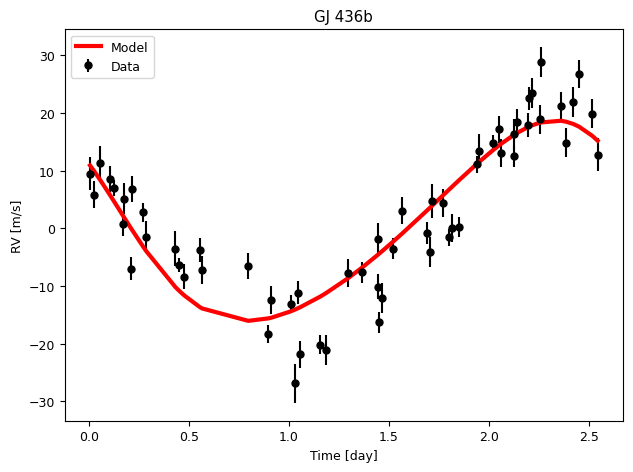

In [ ]:
from astropy.constants import G, M_sun

# Extracting time (Barycentric Julian Date)
h = tab3["JD"].data

# Orbital parameters: [P, T_periastron, e, omega, K]
orbital_solution3 = [2.643904, 2451552.077, 0.152, 420 / 360.0 * 2 * np.pi, 17.38]  # Period, Time at Periastron, Eccentricity, Argument of Periastron, RV Semi-Amplitude

# Compute radial velocities from model
rvs_3 = radvel.kepler.rv_drive(h, orbital_solution3, use_c_kepler_solver=False)

# Extract orbital parameters
P_3 = orbital_solution3[0]  # Period in days
e_3 = orbital_solution3[2]  # Eccentricity
K_3 = orbital_solution3[4]  # RV semi-amplitude in m/s

# === Plot Observed vs Modeled RVs ===
# Fold data by orbital period
ind_3 = np.argsort(h % P_3)
plt.errorbar(tab3["JD"] % P_3, tab3["Radial_Velocity"], tab3["Radial_Velocity_Uncertainty"],
             color="black", ms=5, marker="o", ls="none", label="Data")
plt.plot((h % P_3)[ind_3], rvs_3[ind_3], "r-", label="Model", lw=3)
plt.legend()
plt.xlabel("Time [day]")
plt.ylabel("RV [m/s]")
plt.title("GJ 436b")
plt.tight_layout()

**Mpsini**

In [ ]:
# ==== Compute Planetary Minimum Mass (M_p sin i) ====
# Convert period to seconds (since we use SI units)
P_sec_3 = P_3 * 86400  # days to seconds

# Assume stellar mass (adjust if known)
M_star_3 = 1.0 * M_sun.value  # 1 Solar mass in kg (adjust if known)

# Compute M_p sin i using the radial velocity equation
Mp_sini_3 = (K_3 * P_sec_3**(1/3) * M_star_3**(2/3)) / ((2 * np.pi * G.value)**(1/3) * np.sqrt(1 - e**2))

# Convert to Jupiter masses (1 Jupiter mass = 1.898 x 10^27 kg)
M_jup = 1.898e27  # kg
Mp_sini_Mjup_3 = Mp_sini_3 / M_jup

# Print the result
print(f"Minimum planet mass GJ 436b (M_p sin i): {Mp_sini_Mjup_3:.4f} M_Jup")

Minimum planet mass GJ 436b (M_p sin i): 0.1183 M_Jup


**Mp**

In [ ]:
# Convert Jupiter mass to Earth mass (1 Jupiter mass = 317.8 Earth masses)
Mp_true_Mearth_3 = Mp_sini_Mjup_3 * 317.8

# Print the true planet mass in Earth masses
print(f"True planet mass GJ 436b (M_p): {Mp_true_Mearth_3:.4f} M_Earth")#
print("0.1182 Jupiter Masses")

True planet mass GJ 436b (M_p): 37.5811 M_Earth
0.1182 Jupiter Masses


**Uncertainty**

In [ ]:
# === Uncertainty Propagation ===

i_deg = 90  # Example: if you know the inclination, change this value
i_rad = np.radians(i_deg)  # Convert inclination to radians

# Extract the uncertainty in RV semi-amplitude (K)
K_uncertainty_3 = tab3["Radial_Velocity_Uncertainty"].mean()  # Mean uncertainty in K

# Compute the uncertainty in the planet's mass
dMp_dK_3 = (P_sec_3**(1/3) * M_star_3**(2/3)) / ((2 * np.pi * G.value)**(1/3) * np.sqrt(1 - e_3**2) * np.sin(i_rad))
sigma_Mp_3 = dMp_dK_3 * K_uncertainty_3

# Convert uncertainty in mass to Earth masses
sigma_Mp_Mearth_3 = sigma_Mp_3 / M_jup * 317.8

# Print the uncertainty in the planet's mass
print(f"Uncertainty in planet mass HD 209458b (σ_M_p): {sigma_Mp_Mearth_3:.4f} M_Earth")

Uncertainty in planet mass HD 209458 (σ_M_p): 4.9576 M_Earth


# **Planet 209458 Transit, Radius**

In [ ]:
tr_data_1 = astropy.io.ascii.read("UID_0108859_PLC_010.tbl.txt", format = 'ipac')

In [ ]:
# Print column names
print('Column names:')
print()
tr_data_1.colnames

Column names:



['HJD', 'Relative_Flux', 'Relative_Flux_Uncertainty', 'Accepted']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as ascii

!pip install pylightcurve
import pylightcurve as plc


In [ ]:
# best-fit parameters from ExoFast
planet, stellar_logg, stellar_temperature, stellar_metallicity, rp_over_rs, \
fp_over_fs, period, sma_over_rs, eccentricity, inclination, periastron, mid_time = \
"HD 209458", 4.5, 6071, 0, 0.1135, 0.0129, \
3.5427, 8.81, 0, 86.71, 83, 2452826.628521

In [ ]:
time_array_1 = tr_data_1["HJD"].data

In [ ]:
# Calculate Limb-darkening parameters manually since clablimb doesn't work
#limb_darkening_coefficients_1 = plc.clablimb('claret', stellar_logg, stellar_temperature,
#                                              stellar_metallicity, 'V')


# Define the quadratic limb-darkening function
def limb_darkening(mu, u1, u2):
    return 1 - u1 * (1 - mu) - u2 * (1 - mu)**2

# Example limb-darkening coefficients (replace with actual data)
u1 = 0.35  # Linear coefficient, just using the sun's
u2 = 0.1  # Quadratic coefficient

# Function to calculate the intensity over the star's disk at various points
def calculate_limb_darkening(time_array_1, u1, u2):
    mu_values = np.linspace(0, 1, len(time_array_1))  # This would depend on the actual geometry of the transit

    # Calculate the intensity profile across the star's disk
    intensity_values = limb_darkening(mu_values, u1, u2)

    return intensity_values

# Example usage (you would replace this with actual data)
stellar_radius = 13.74  #Jupiter Radius
planet_radius = 1.359  # Example: replace with the actual planet's radius
orbital_params = {}  # Placeholder for orbital parameters

# Now, calculate the limb-darkening corrected light curve (this is a simplified approach)
time_array_calc = np.linspace(mid_time - 0.5, mid_time + 0.5, 1000)
limb_darkening_profile = calculate_limb_darkening(time_array_1, u1, u2)

print("Limb-darkening profile:", limb_darkening_profile)


Limb-darkening profile: [0.55       0.55109304 0.5521853  0.55327676 0.55436743 0.55545732
 0.55654641 0.55763471 0.55872222 0.55980894 0.56089487 0.56198001
 0.56306436 0.56414792 0.56523068 0.56631266 0.56739385 0.56847424
 0.56955385 0.57063267 0.57171069 0.57278792 0.57386437 0.57494002
 0.57601488 0.57708896 0.57816224 0.57923473 0.58030643 0.58137734
 0.58244746 0.58351679 0.58458533 0.58565308 0.58672004 0.58778621
 0.58885158 0.58991617 0.59097997 0.59204297 0.59310519 0.59416661
 0.59522724 0.59628709 0.59734614 0.5984044  0.59946188 0.60051856
 0.60157445 0.60262955 0.60368386 0.60473738 0.60579011 0.60684205
 0.6078932  0.60894356 0.60999312 0.6110419  0.61208989 0.61313708
 0.61418349 0.6152291  0.61627393 0.61731796 0.6183612  0.61940366
 0.62044532 0.62148619 0.62252627 0.62356556 0.62460407 0.62564178
 0.6266787  0.62771482 0.62875016 0.62978471 0.63081847 0.63185144
 0.63288361 0.633915   0.63494559 0.6359754  0.63700441 0.63803264
 0.63906007 0.64008672 0.64111257 0.64

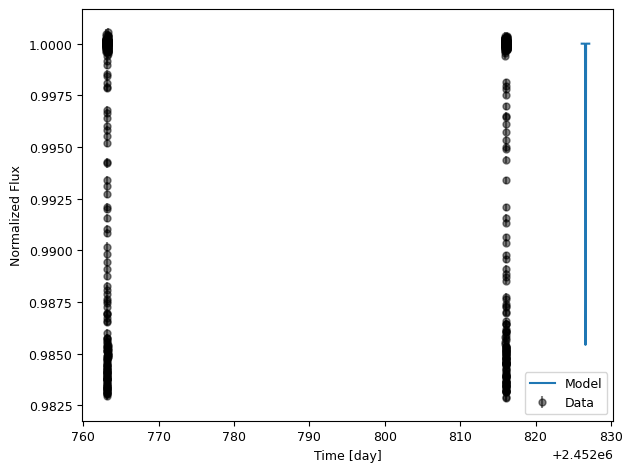

In [ ]:
# Example coefficients (adjust these values as per your data)
limb_darkening_coefficients = [0.38053152064099915, 0.15572055172934288, 0.3873949129013969, -0.23676394656438396]  # Example for the claret model

# Now call the transit_integrated function with the correct number of coefficients
flux_array = plc.transit_integrated(
    limb_darkening_coefficients=limb_darkening_coefficients,  # Correct format: 4 coefficients
    rp_over_rs=rp_over_rs,
    period=period,
    sma_over_rs=sma_over_rs,
    eccentricity=eccentricity,
    inclination=inclination,
    periastron=periastron,
    mid_time=mid_time,
    time_array=time_array_calc,  # Ensure it's the same length as time_array_calc
    exp_time=120,  # Exposure time in minutes (or appropriate value)
    max_sub_exp_time=120,  # Maximum sub-exposure time
    precision=6  # Set precision once here
)
#

# Plot the results
plt.plot(time_array_calc, flux_array, label="Model")

# Overlay the data points on top of the model curve
plt.errorbar(time_array_1, tr_data_1["Relative_Flux"], yerr=tr_data_1["Relative_Flux_Uncertainty"], fmt="o", color="black", alpha=0.5, label="Data")

plt.xlabel('Time [day]')
plt.ylabel('Normalized Flux')
plt.legend()
plt.tight_layout()
plt.show()




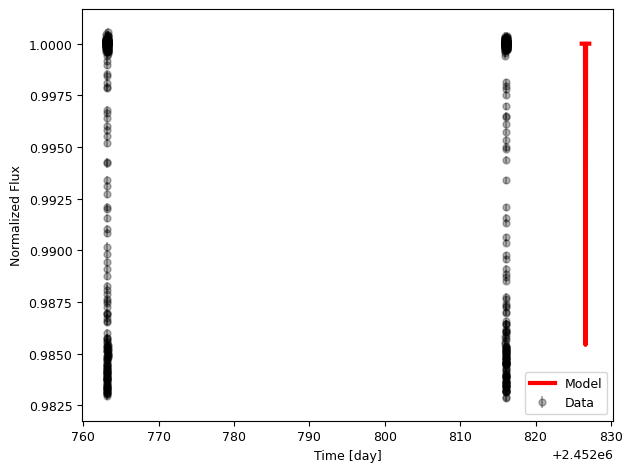

In [ ]:
plt.errorbar(tr_data_1["HJD"], tr_data_1["Relative_Flux"], tr_data_1["Relative_Flux_Uncertainty"], ms=5, \
             marker="o", ls="none", label="Data", color="black", alpha=0.3)

#flx = 2.512**(tr_data_1["Relative_Flux"])
#flx = flx / np.median(flx)
#plt.plot(tr_data_1["Relative_Flux"], flx , ms=5, \
#             marker="o", ls="none", label="Data", color="black", alpha=0.3)

plt.plot(time_array_calc, flux_array, 'r-', lw=3, label="Model")
plt.ylim(plt.ylim()[0], plt.ylim()[1])
plt.xlabel('Time [day]')
plt.ylabel('Normalized Flux')
plt.legend()
plt.tight_layout()

#plt.xlim(2452810.00, 2452842.013)
#plt.ylim(0.98, 1.005)

# **Trying something else**

In [ ]:
# Extract time and flux columns
time = tr_data_1['HJD']  # Heliocentric Julian Date
flux = tr_data_1['Relative_Flux']

# Estimate out-of-transit flux using the median
out_of_transit_flux = np.median(flux)

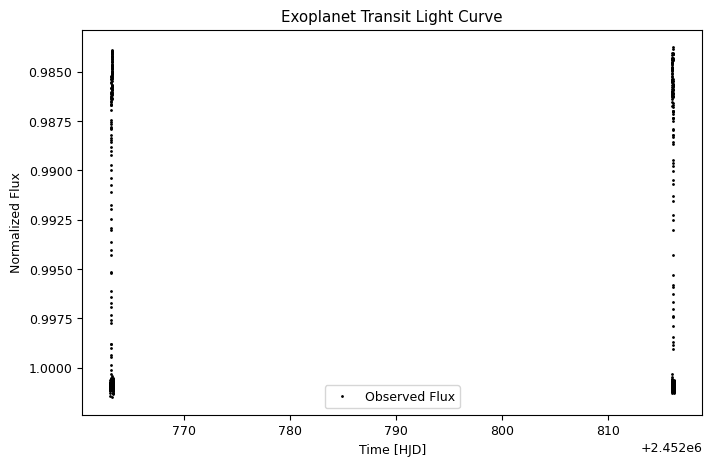

In [ ]:
# Normalize the flux
normalized_flux = flux / out_of_transit_flux

# Plot time vs. normalized flux
plt.figure(figsize=(8, 5))
plt.plot(time, normalized_flux, 'k.', markersize=2, label='Observed Flux')
plt.xlabel('Time [HJD]')
plt.ylabel('Normalized Flux')
plt.title('Exoplanet Transit Light Curve')
plt.legend()
plt.gca().invert_yaxis()  # So transit appears as a dip
plt.show()

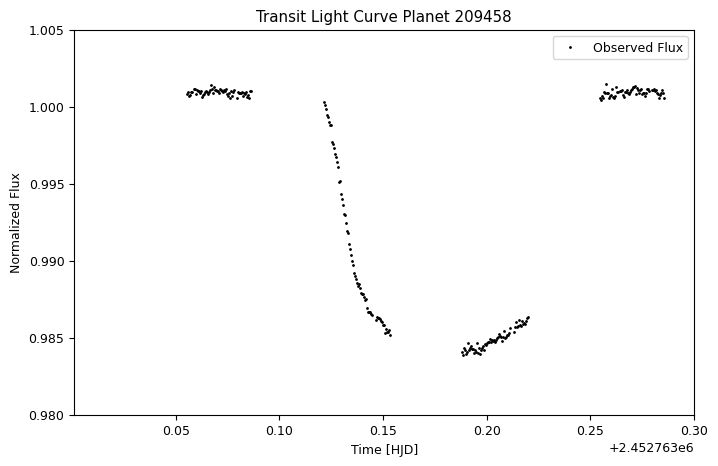

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(time, normalized_flux, 'k.', markersize=2, label='Observed Flux')


plt.xlim(2452763.001, 2452763.3)
plt.ylim(0.98, 1.005)

plt.xlabel('Time [HJD]')
plt.ylabel('Normalized Flux')
plt.title('Transit Light Curve Planet 209458')
plt.legend()

plt.show()


In [ ]:
import pylightcurve as plc
import matplotlib.pyplot as plt
import numpy as np

planet = plc.Planet(
    name='HD209458b',

    ra = 330.795,                  # float values are assumed to be in degrees,
                                   # alternatively, you can provide a plc.Hours or plc.Degrees object
                                   # here it would be plc.Hours('22:03:10.7729')

    dec = 18.884,                  # float values are assumed to be in degrees,
                                   # alternatively, you can provide a plc.Hours or plc.Degrees object
                                   # here it would be plc.Degrees('+18:53:03.548')

    stellar_logg = 4.36,           # float, in log(cm/s^2)

    stellar_temperature = 6065.0,  # float, in Kelvin

    stellar_metallicity = 0.0,     # float, in dex(Fe/H) or dex(M/H)

    rp_over_rs = 0.12086,          # float, no units

    period = 3.5247486,            # float, in days

    sma_over_rs = 8.76,            # float, no units

    eccentricity = 0.0,            # float, no units

    inclination = 86.71,           # float values are assumed to be in degrees,
                                   # alternatively, you can provide a plc.Hours or plc.Degrees object
                                   # here it would be plc.Degrees(86.71)

    periastron = 0.0,              # float values are assumed to be in degrees,
                                   # alternatively, you can provide a plc.Hours or plc.Degrees object
                                   # here it would be plc.Degrees(0.0)

    mid_time = 2452826.62928,      # float, in days

    mid_time_format = 'BJD_TDB',   # str, available formats are JD_UTC, MJD_UTC, HJD_UTC, HJD_TDB, BJD_UTC, BJD_TDB

    ldc_method = 'claret',         # str, default = claret, the other methods are: linear, quad, sqrt

    ldc_stellar_model = 'phoenix', # str, default = phoenix, the other model is atlas

    albedo = 0.15,                 # float, default = 0.15, no units

    emissivity = 1.0,              # float, default = 1.0, no units
)

In [ ]:
planet = plc.get_planet('hd209458b')

In [ ]:
limb_darkening_coefficients = planet.filter('COUSINS_R').limb_darkening_coefficients
fp_over_fs = planet.filter('COUSINS_R').fp_over_fs
rp_over_rs = planet.filter('COUSINS_R').rp_over_rs # no difference from planet.rp_over_rs if we have not defined our own filter

Fp/Fs estimated using A=0.15, e=1.0 for filter COUSINS_R.


In [ ]:
# These are the coefficients that were plugged into the code under the limb-darkening profile block
print(limb_darkening_coefficients)


[0.38053152064099915, 0.15572055172934288, 0.3873949129013969, -0.23676394656438396]


In [ ]:

# first observation
time = np.arange(planet.mid_time - 0.1, planet.mid_time + 0.1, 0.001)

transit = planet.transit_integrated(time, time_format='BJD_TDB', exp_time=120, time_stamp = 'mid', filter_name='COUSINS_R', max_sub_exp_time=1)
systematics = 1.2 * (1 + 0.013 * (time - time[0]) + 0.03 * ((time - time[0]) ** 2))
error = np.random.normal(0, 0.002, len(time))
flux = transit * systematics + error

flux_unc = np.ones_like(error) * np.std(error)

planet.add_observation(
    time = time,                # the time vector of our observation
                                # np.array of float values

    time_format = 'BJD_TDB',    # format in which our time vector is expressed
                                # str, available formats are: JD_UTC, MJD_UTC, HJD_UTC, HJD_TDB, BJD_UTC, BJD_TDB

    exp_time = 120,             # exposure time of our time vector
                                # float, in seconds

    time_stamp = 'mid',         # exposure time stamp for our time vector (do the numbers refer to the exposure start, the mid-exposure, or the exposure end?)
                                # str, available stamps are: start, mid, end

    flux = flux,                # the flux vector of our observation
                                # np.array of float values,

    flux_unc = flux_unc,        # the flux-uncertainty vector of our observation
                                # np.array of float values,

    flux_format = 'flux',       # format in which our flux and flux-uncertainty vectors are expressed
                                # str, available formats are: flux, mag

    filter_name = 'COUSINS_R'   # filter used for this observation
                                # str, available filters are: all the default filters and those added manually by us
)

# second observation
time = np.arange(planet.mid_time - 0.05, planet.mid_time + 0.15, 0.001)

transit = planet.transit_integrated(time, time_format='HJD_UTC', exp_time=30, time_stamp = 'mid', filter_name='TESS', max_sub_exp_time=1)
systematics = 3.6 * (1 - 0.02 * (time - time[0]) + 0.05 * ((time - time[0]) ** 2))
error = np.random.normal(0, 0.0005, len(time))
flux = transit * systematics + error

flux_unc = np.ones_like(error) * np.std(error)

planet.add_observation(
    time = time,
    time_format = 'HJD_UTC',
    exp_time = 30,
    time_stamp = 'mid',
    flux = flux,
    flux_unc = flux_unc,
    flux_format = 'flux',
    filter_name = 'TESS'
)

Fp/Fs estimated using A=0.15, e=1.0 for filter TESS.


In [ ]:

transit_depth = 0.015  # Example transit depth (1% drop in flux)
R_star = 1.1999759942400  # Star's radius in solar radii

# Calculate the planet's radius in solar radii
R_planet_solar = R_star * np.sqrt(transit_depth)

# Convert the planet's radius to Jupiter radii
R_planet_jupiter = R_planet_solar * 10.971

# Display the result
print(f"HD 209458b Planet's radius: {R_planet_jupiter:.4f} R_Jupiter")

HD 209458b Planet's radius: 1.6124 R_Jupiter


In [ ]:
import numpy as np

# Example values
transit_depth = 0.015  # Example transit depth (1% drop in flux)
R_star = 1.1999759942400  # Star's radius in solar radii
delta_D = 0.0024  # Uncertainty in transit depth
delta_R_star = 0.0282007051787  # Uncertainty in star's radius in solar radii

# Calculate the planet's radius in solar radii
R_planet_solar = R_star * np.sqrt(transit_depth)

# Uncertainty propagation
partial_D = 0.5 * R_star * transit_depth**(-0.5)  # derivative wrt D
partial_R_star = np.sqrt(transit_depth)  # derivative wrt R_star

# Uncertainty in the planet's radius
delta_R_planet_solar = np.sqrt((partial_D * delta_D)**2 + (partial_R_star * delta_R_star)**2)

# Convert the planet's radius to Jupiter radii
R_planet_jupiter = R_planet_solar * 10.971
delta_R_planet_jupiter = delta_R_planet_solar * 10.971

# Display the result
print(f"HD 209458 Planet's radius: {R_planet_jupiter:.4f} R_Jupiter ± {delta_R_planet_jupiter:.4f} R_Jupiter")


HD 209458 Planet's radius: 1.6124 R_Jupiter ± 0.1344 R_Jupiter


# **HD 189733b, Transit for Radius**

In [ ]:
tr_data_2 = astropy.io.ascii.read("UID_0098505_PLC_017.tbl.txt", format = 'ipac')

In [ ]:
# Print column names
print('Column names:')
print()
tr_data_2.colnames

Column names:



['HJD', 'Flux', 'Flux_Uncertainty', 'Accepted']

In [ ]:
# Extract time and flux columns
time_2 = tr_data_2['HJD']  # Heliocentric Julian Date
flux_2 = tr_data_2['Flux']

# Estimate out-of-transit flux using the median
out_of_transit_flux_2 = np.median(flux_2)

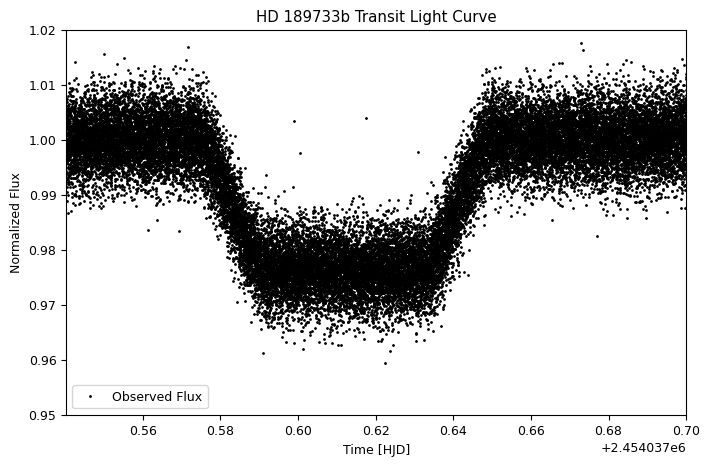

In [ ]:
# Normalize the flux
normalized_flux_2 = flux_2 / out_of_transit_flux_2

# Plot time vs. normalized flux
plt.figure(figsize=(8, 5))
plt.plot(time_2, normalized_flux_2, 'k.', markersize=2, label='Observed Flux')
plt.xlabel('Time [HJD]')
plt.ylabel('Normalized Flux')
plt.title('HD 189733b Transit Light Curve')
plt.legend()

plt.xlim(min(time_2), 7.7+2.45403e6)
plt.ylim(0.95, 1.02)

plt.show()

In [ ]:
# Example values
transit_depth = 0.024
R_star = 0.78271930158600000  # Star's radius in solar radii
delta_D = 0.0058  # Uncertainty in transit depth
delta_R_star = 0.01396094224705000  # Uncertainty in star's radius in solar radii

# Calculate the planet's radius in solar radii
R_planet_solar = R_star * np.sqrt(transit_depth)

# Uncertainty propagation
partial_D = 0.5 * R_star * transit_depth**(-0.5)  # derivative wrt D
partial_R_star = np.sqrt(transit_depth)  # derivative wrt R_star

# Uncertainty in the planet's radius
delta_R_planet_solar = np.sqrt((partial_D * delta_D)**2 + (partial_R_star * delta_R_star)**2)

# Convert the planet's radius to Jupiter radii
R_planet_jupiter = R_planet_solar * 10.971
delta_R_planet_jupiter = delta_R_planet_solar * 10.971

# Display the result
print(f"HD 189733 Planet's radius: {R_planet_jupiter:.4f} R_Jupiter ± {delta_R_planet_jupiter:.4f} R_Jupiter")

HD 189733 Planet's radius: 1.3303 R_Jupiter ± 0.1625 R_Jupiter


# **GJ 436, Transit Depth for Radius**

In [ ]:
tr_data_3 = astropy.io.ascii.read("UID_0057087_PLC_008.tbl.txt", format = 'ipac')

In [ ]:
# Print column names
print('Column names:')
print()
tr_data_3.colnames

Column names:



['HJD', 'Normalized_Flux', 'Normalized_Flux_Uncertainty', 'Accepted']

In [ ]:
# Extract time and flux columns
time_3 = tr_data_3['HJD']  # Heliocentric Julian Date
flux_3 = tr_data_3['Normalized_Flux']

# Estimate out-of-transit flux using the median
out_of_transit_flux_3 = np.median(flux_3)

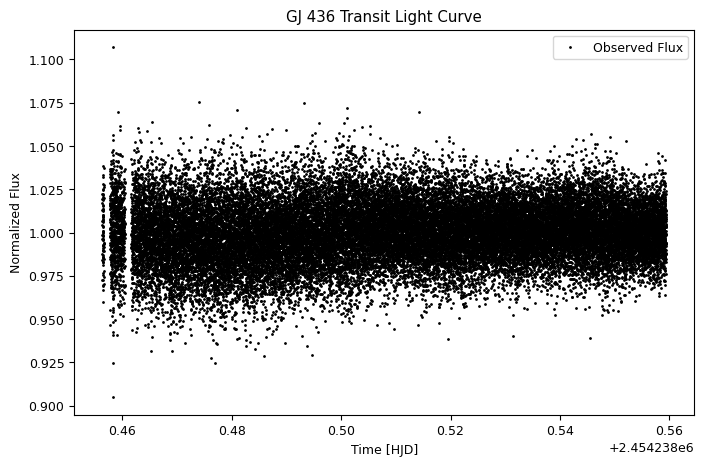

In [ ]:
# Normalize the flux
normalized_flux_3 = flux_3 / out_of_transit_flux_3

# Plot time vs. normalized flux
plt.figure(figsize=(8, 5))
plt.plot(time_3, normalized_flux_3, 'k.', markersize=2, label='Observed Flux')
plt.xlabel('Time [HJD]')
plt.ylabel('Normalized Flux')
plt.title('GJ 436 Transit Light Curve')
plt.legend()

#plt.xlim(min(time_3), 0.02+2.45403e6)
#plt.ylim(0.95, 1.050)

plt.show()

In [ ]:

transit_depth = 0.6819
R_star = 0.41684304009899997  # Star's radius in solar radii
delta_D = 0.0028  # Uncertainty in transit depth
delta_R_star = 0.00756258617250750  # Uncertainty in star's radius in solar radii

# Calculate the planet's radius in solar radii
R_planet_solar = R_star * np.sqrt(transit_depth)

# Uncertainty propagation
partial_D = 0.5 * R_star * transit_depth**(-0.5)  # derivative wrt D
partial_R_star = np.sqrt(transit_depth)  # derivative wrt R_star

# Uncertainty in the planet's radius
delta_R_planet_solar = np.sqrt((partial_D * delta_D)**2 + (partial_R_star * delta_R_star)**2)

# Convert the planet's radius to Jupiter radii
R_planet_jupiter = R_planet_solar * 10.971
delta_R_planet_jupiter = delta_R_planet_solar * 10.971

# Display the result
print(f"GJ 436 Planet's radius: {R_planet_jupiter:.4f} R_Jupiter ± {delta_R_planet_jupiter:.4f} R_Jupiter")

GJ 436 Planet's radius: 3.7764 R_Jupiter ± 0.0690 R_Jupiter


# **Another GJ 436 file**

In [ ]:
tr_data_4 = astropy.io.ascii.read("UID_GJ436_2_PLC_023.tbl.txt", format = 'ipac')

In [ ]:
# Print column names
print('Column names:')
print()
tr_data_4.colnames

Column names:



['BJD', 'Relative_Flux', 'Relative_Flux_Uncertainty', 'Accepted']

In [ ]:
# Extract time and flux columns
time_4 = tr_data_4['BJD']  # Heliocentric Julian Date
flux_4 = tr_data_4['Relative_Flux']

# Estimate out-of-transit flux using the median
out_of_transit_flux_4 = np.median(flux_4)

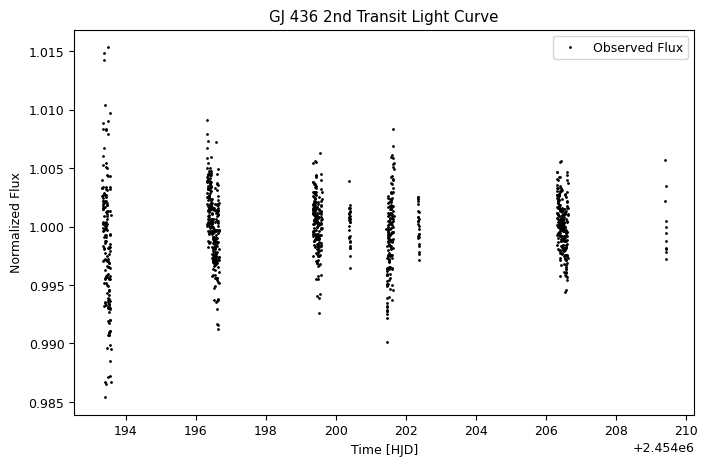

In [ ]:
# Normalize the flux
normalized_flux_4 = flux_4 / out_of_transit_flux_4

# Plot time vs. normalized flux
plt.figure(figsize=(8, 5))
plt.plot(time_4, normalized_flux_4, 'k.', markersize=2, label='Observed Flux')
plt.xlabel('Time [HJD]')
plt.ylabel('Normalized Flux')
plt.title('GJ 436 2nd Transit Light Curve')
plt.legend()



plt.show()

# **Calculating Density**

**HD 209458**

In [ ]:
import numpy as np

import numpy as np

# HD 209458b

# Constants
M_Jup = 1.898 * 10**27  # Mass of Jupiter in kg
R_Jup = 6.9934 * 10**7  # Radius of Jupiter in meters

# Input values
M_planet_jupiter = 0.6296 * M_Jup  # Planet's mass in kg
R_planet_jupiter = 1.6124 * R_Jup  # Planet's radius in meters

# Uncertainties
delta_M_planet_jupiter = 0.0765 * M_Jup
delta_R_planet_jupiter = 0.1344 * R_Jup

# Calculate the volume of the planet (V = 4/3 * pi * R^3)
volume_planet = (4/3) * np.pi * (R_planet_jupiter ** 3)

# Calculate the density of the planet (rho = M / V)
density_planet = M_planet_jupiter / volume_planet  # Density in kg/m³

# Uncertainty propagation
# Partial derivatives
d_rho_d_M = 1 / volume_planet  # Partial derivative of density with respect to mass
d_rho_d_R = -3 * M_planet_jupiter / (volume_planet * R_planet_jupiter)  # Partial derivative of density with respect to radius

# Calculate uncertainty in density (sigma_rho)
sigma_rho = np.sqrt((d_rho_d_M * delta_M_planet_jupiter) ** 2 + (d_rho_d_R * delta_R_planet_jupiter) ** 2)

# Calculate uncertainty in density (sigma_rho) in g/cm³
sigma_rho = np.sqrt((d_rho_d_M * delta_M_planet_jupiter) ** 2 + (d_rho_d_R * delta_R_planet_jupiter) ** 2)


# Output the result
print(f"Planet's density: {density_planet:.2e} g/cm³")
print(f"Uncertainty in density: {sigma_rho:.2e} g/cm³")



Planet's density: 1.99e+02 g/cm³
Uncertainty in density: 5.53e+01 g/cm³


 **HD 189733**

In [ ]:
import numpy as np

# Constants (assuming these are defined somewhere)
M_Jup = 1.898e27  # Jupiter's mass in kg
R_Jup = 7.1492e7  # Jupiter's radius in meters

# Input values (planet's mass and radius in Jupiter units)
M_planet_jupiter = 1.292 * M_Jup  # Planet's mass in kg
R_planet_jupiter = 1.3303 * R_Jup  # Planet's radius in meters

# Uncertainties
delta_M_planet_jupiter = 0.0058 * M_Jup  # Uncertainty in mass
delta_R_planet_jupiter = 0.1625 * R_Jup  # Uncertainty in radius

# Calculate the volume of the planet (V = 4/3 * pi * R^3)
volume_planet = (4/3) * np.pi * (R_planet_jupiter ** 3)

# Calculate the density of the planet (rho = M / V) in kg/m³
density_planet = M_planet_jupiter / volume_planet

# Uncertainty propagation
# Partial derivatives
d_rho_d_M = 1 / volume_planet  # Partial derivative of density with respect to mass
d_rho_d_R = -3 * M_planet_jupiter / (volume_planet * R_planet_jupiter)  # Partial derivative of density with respect to radius

# Calculate uncertainty in density (sigma_rho) in kg/m³
sigma_rho = np.sqrt((d_rho_d_M * delta_M_planet_jupiter) ** 2 + (d_rho_d_R * delta_R_planet_jupiter) ** 2)

# Convert density and uncertainty to g/cm³ (1 kg/m³ = 0.001 g/cm³)
density_planet_gcm3 = density_planet * 1e-3
sigma_rho_gcm3 = sigma_rho * 1e-3

# Output the results
print(f"Planet's density: {density_planet_gcm3:.2e} g/cm³")
print(f"Uncertainty in density: {sigma_rho_gcm3:.2e} g/cm³")


Planet's density: 6.81e-01 g/cm³
Uncertainty in density: 2.49e-01 g/cm³


**GJ 436b**

In [ ]:
# Input values
M_planet_jupiter = 0.1185 * M_Jup  # Planet's mass in kg
R_planet_jupiter = 3.7764 * R_Jup  # Planet's radius in meters

# Uncertainties
delta_M_planet_jupiter = 0.0058 * M_Jup
delta_R_planet_jupiter = 0.0690 * R_Jup

# Calculate the volume of the planet (V = 4/3 * pi * R^3)
volume_planet = (4/3) * np.pi * (R_planet_jupiter ** 3)

# Calculate the density of the planet (rho = M / V)
density_planet = M_planet_jupiter / volume_planet  # Density in kg/m³

# Uncertainty propagation
# Partial derivatives
d_rho_d_M = 1 / volume_planet  # Partial derivative of density with respect to mass
d_rho_d_R = -3 * M_planet_jupiter / (volume_planet * R_planet_jupiter)  # Partial derivative of density with respect to radius

# Calculate uncertainty in density (sigma_rho)
sigma_rho = np.sqrt((d_rho_d_M * delta_M_planet_jupiter) ** 2 + (d_rho_d_R * delta_R_planet_jupiter) ** 2)

# Calculate uncertainty in density (sigma_rho) in g/cm³
sigma_rho = np.sqrt((d_rho_d_M * delta_M_planet_jupiter) ** 2 + (d_rho_d_R * delta_R_planet_jupiter) ** 2)


# Output the result
print(f"Planet's density: {density_planet:.2e} g/cm³")
print(f"Uncertainty in density: {sigma_rho:.2e} g/cm³")

Planet's density: 2.91e+00 g/cm³
Uncertainty in density: 2.14e-01 g/cm³


# **Graph showing 189733b comparisons**

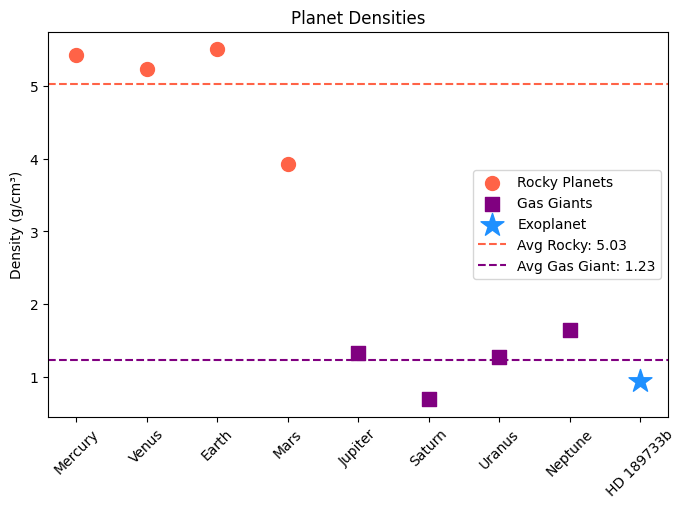

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Planet densities (g/cm³)
planets = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
densities = [5.43, 5.24, 5.51, 3.93, 1.33, 0.69, 1.27, 1.64]

# Your exoplanet (change this value)
exoplanet = "HD 189733b"
exoplanet_density = 0.943  # Example value

# Categorize rocky planets and gas giants
rocky = planets[:4]
gas_giants = planets[4:]

# Compute averages
avg_rocky_density = np.mean(densities[:4])
avg_gas_density = np.mean(densities[4:])

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(rocky, densities[:4], color='tomato', label="Rocky Planets", s = 100)
plt.scatter(gas_giants, densities[4:], color='purple', label="Gas Giants", s = 100, marker = 's')
plt.scatter(exoplanet, exoplanet_density, color='dodgerblue', label="Exoplanet", marker='*', s = 300)

# Add horizontal average density lines
plt.axhline(avg_rocky_density, color='tomato', linestyle='dashed', label=f'Avg Rocky: {avg_rocky_density:.2f}')
plt.axhline(avg_gas_density, color='purple', linestyle='dashed', label=f'Avg Gas Giant: {avg_gas_density:.2f}')

# Labels and title
plt.ylabel("Density (g/cm³)")
plt.title("Planet Densities")
plt.xticks(rotation=45)
plt.legend()
#plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()
